[Reference](https://medium.com/aimonks/bootstrap-resampling-for-hypothesis-tests-a-modern-approach-to-statistical-inference-8e367c61300e)

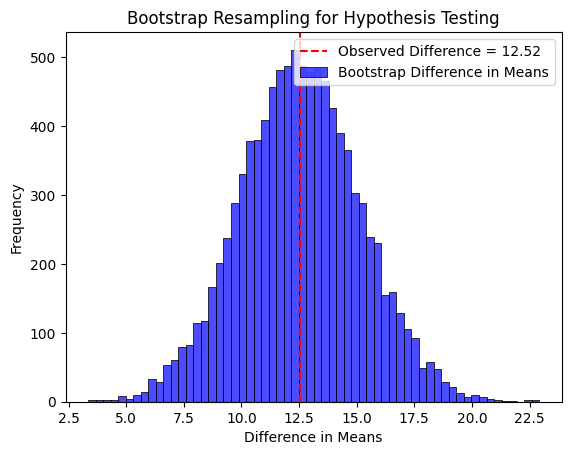

P-value: 0.5003


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic data
np.random.seed(42) # For reproducibility
control_group = np.random.normal(100, 20, 100) # Mean = 100, SD = 20, n = 100
treatment_group = np.random.normal(110, 20, 100) # Mean = 110, SD = 20, n = 100

# Function to perform bootstrap resampling
def bootstrap_resample(data, n_bootstrap=10000):
    bootstrap_means = []
    for _ in range(n_bootstrap):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_means.append(np.mean(bootstrap_sample))
    return bootstrap_means

# Perform bootstrap resampling
control_means = bootstrap_resample(control_group)
treatment_means = bootstrap_resample(treatment_group)

# Compute the observed difference in means
obs_diff = np.mean(treatment_group) - np.mean(control_group)

# Combine the datasets and compute the difference in bootstrap means
combined_means = np.array(treatment_means) - np.array(control_means)

# Compute the p-value
p_value = np.sum(combined_means >= obs_diff) / len(combined_means)

# Plotting
sns.histplot(combined_means, color='blue', alpha=0.7, label='Bootstrap Difference in Means')
plt.axvline(obs_diff, color='red', linestyle='--', label=f'Observed Difference = {obs_diff:.2f}')
plt.xlabel('Difference in Means')
plt.ylabel('Frequency')
plt.title('Bootstrap Resampling for Hypothesis Testing')
plt.legend()
plt.show()

# Print the p-value
print(f'P-value: {p_value:.4f}')